In [16]:
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
class calc:

        
    def newton_lense(*args):
        
        #Gravitational constant
        G = 6.67e-11 #in SI
    
        #Mass of the source
        M = 5.17e36  # 40 billion solar mass or 4 million solar mass

    

        #k_bh
        kbh = np.array([1,1,1])
        kbh = kbh/np.linalg.norm(kbh)

       


        c = 299792458 #m/s
        
        d = args[0] 
        r = np.array([d[args[1]],0,0]) #assuming the galactic center at (0,0,0)

        #calculation of the acceleration-NEWTON
        a = -G*M*r/( np.power(np.linalg.norm(r),3) )

        #initial velocity
        vx = np.sign(a[1])*mt.sqrt(float(abs(a[1])*r[1]))
        vy = np.sign(a[0])*mt.sqrt(float(abs(a[0])*r[0]))
        vz = np.sign(a[2])*mt.sqrt(float(abs(a[2])*r[2]))

        v = np.array([ vx,vy,vz ])
       # print(v)

        #acceleration due to lense-thirring effect
        c = 299792458 #m/s
        r_mag = np.linalg.norm(r)
        a_spin = args[2]
        a_lense1 = a_spin*np.power(G*M,2.0)*kbh/np.power(c,3.0)
        omegap = (2*a_lense1/np.power(r_mag,3.0)) - ( 6*np.dot(a_lense1,r)*r/np.power(r_mag,5.0) ) 

        a_lense = np.cross(v,omegap)

        distance = np.linalg.norm(r)/1.496e11
       
        return a, a_lense, distance


#class accnew():
#    an = []
#    al = []
#    asum = []
#    dist = []
        
def plot(*args):
        an = []
        al = []
        asum = []
        dist = []

        #position of the object around the source
        #d = np.linspace(7.0e9,1e21,150)  #center  #newton order 10, #lense order 10^10
        d = np.linspace(7e9,3e10,150)  #middle #newton order 10^-12, #lense order 10^-12
        #d = np.linspace(7e21,1e22,150) #outer region #newton order 10^-18, #lense order 10^-22
        a_spin=args[0]
        for i in range(len(d)):

            acceleration = calc.newton_lense(d,i,a_spin)

            an.append(np.linalg.norm(acceleration[0]))
            al.append(np.linalg.norm(acceleration[1]))
            asum.append(np.linalg.norm(acceleration[0] + acceleration[1]))
            dist.append(acceleration[2])
        return an,al,asum,dist
       # print(accnew.an[0])
       # print(accnew.al[1])


        #plt.plot(accnew.dist,accnew.al,label='Lense-Thirring a_spin = '+str(a_spin))
        #plt.plot(accnew.dist,accnew.an,label='Newtonian a_spin = '+str(a_spin))
        #plt.xlabel('Distance in (AU) ',fontsize=18)
        #plt.ylabel("Acceleration (m/s^2)",fontsize=18)
        #plt.xticks(fontsize=18)
        #plt.yticks(fontsize=18)
        #plt.title("Lense-Thirring effect and newtonian acceleration",fontsize=18)
        #plt.legend(fontsize=18)



In [ ]:
#spin 
a_spin = np.array([0.5])



#argument d = position or distance
fig = plt.figure(figsize=(10, 6), dpi=300)

a1 = plot(a_spin[0])


# create dataframe
df_marks = pd.DataFrame({'Distance (AU)': a1[3],
     'Acceleration newton': a1[0],
     'Acceleration lense': a1[1],
     'Acceleration sum': a1[2]})

# create excel writer object
writer = pd.ExcelWriter('acc-data'+str(a_spin[0])+'.xlsx')
# write dataframe to excel
df_marks.to_excel(writer)
# save the excel
writer.save()



plt.plot(a1[3],a1[1],color='blue',linestyle=':',linewidth=4,label='Lense-Thirring a_spin = '+str(a_spin[0]))
plt.plot(a1[3],a1[0],color='red',linestyle=':',linewidth=4, label='Newtonian a_spin = '+str(a_spin[0]))
plt.xlabel('Distance in (AU) ',fontsize=18)
plt.ylabel("Acceleration (m/s^2)",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Lense-Thirring effect and newtonian acceleration",fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.savefig("newton-lense.png")
plt.show()

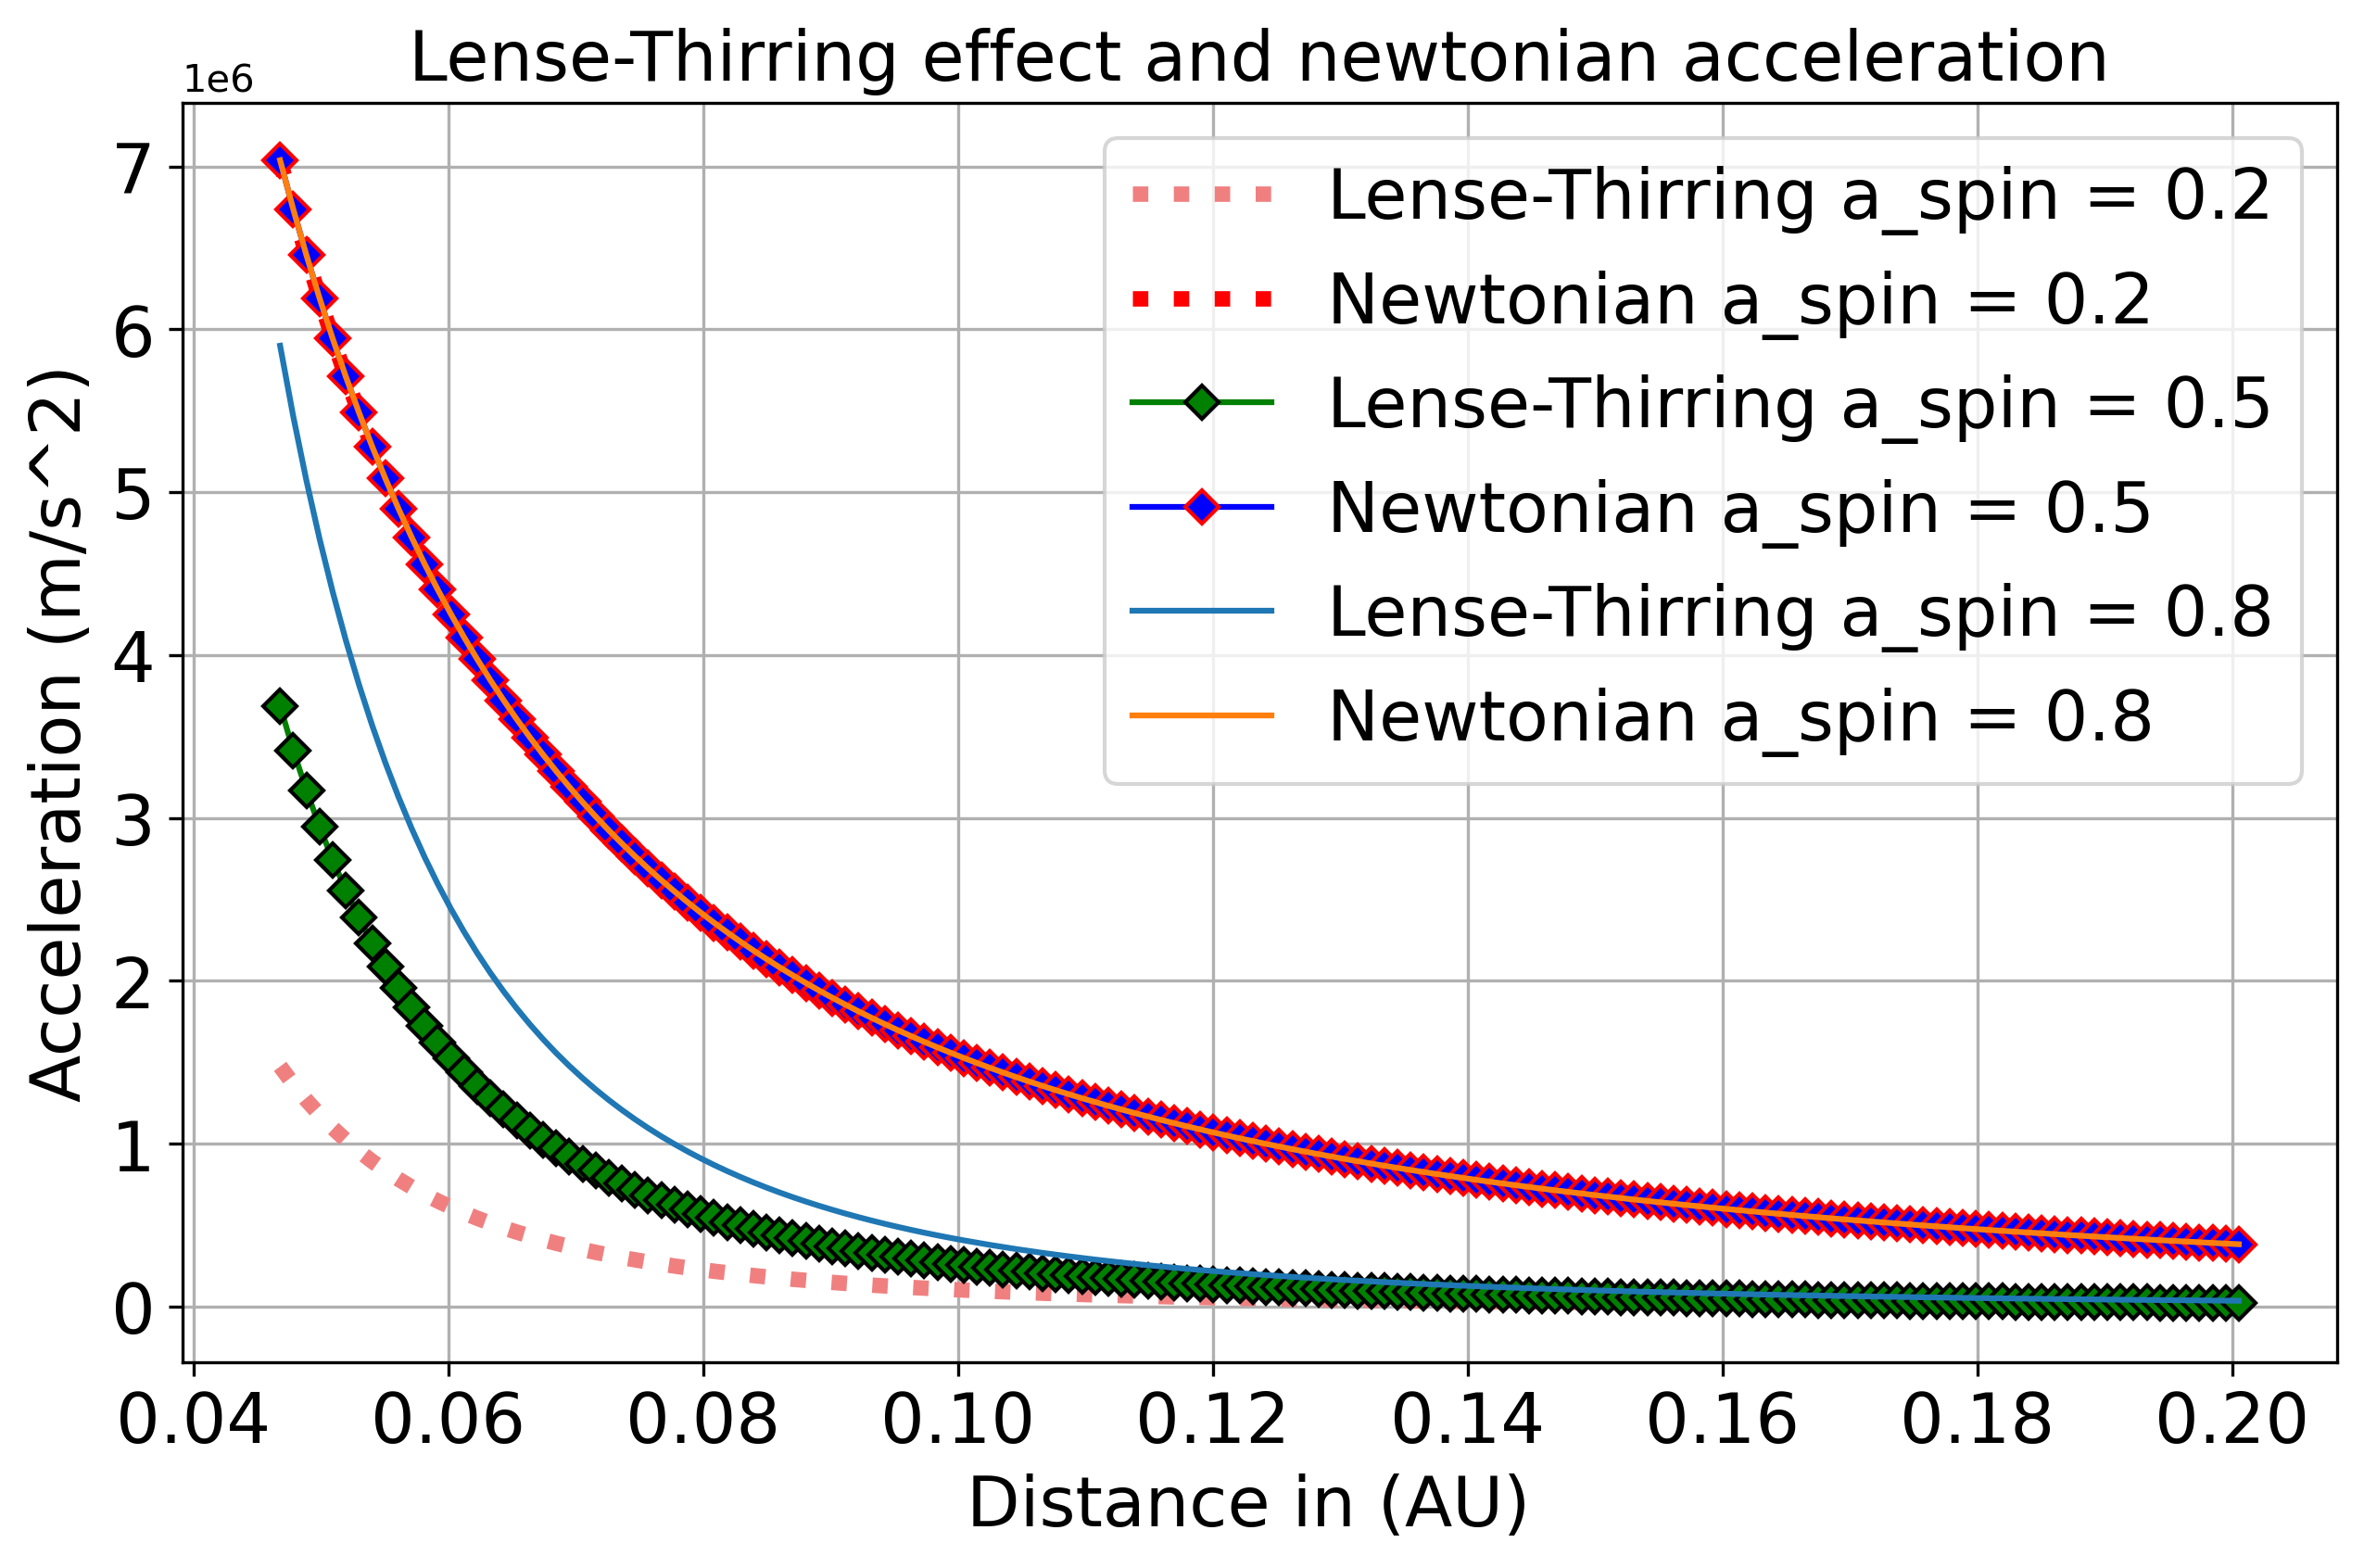

In [18]:

#spin 
a_spin = np.array([0.2,0.5,0.8])



#argument d = position or distance
fig = plt.figure(figsize=(10, 6), dpi=300)

a1 = plot(a_spin[0])
a2 = plot(a_spin[1])
a3 = plot(a_spin[2])

# create dataframe
df_marks = pd.DataFrame({'Distance (AU)': a1[3],
     'Acceleration newton': a1[0],
     'Acceleration lense': a1[1],
     'Acceleration sum': a1[2]})

# create excel writer object
writer = pd.ExcelWriter('acc-data'+str(a_spin[0])+'.xlsx')
# write dataframe to excel
df_marks.to_excel(writer)
# save the excel
writer.save()

# create dataframe
df_marks = pd.DataFrame({'Distance (AU)': a2[3],
     'Acceleration newton': a2[0],
     'Acceleration lense': a2[1],
     'Acceleration sum': a2[2]})

# create excel writer object
writer = pd.ExcelWriter('acc-data'+str(a_spin[1])+'.xlsx')
# write dataframe to excel
df_marks.to_excel(writer)
# save the excel
writer.save()

# create dataframe
df_marks = pd.DataFrame({'Distance (AU)': a3[3],
     'Acceleration newton': a3[0],
     'Acceleration lense': a3[1],
     'Acceleration sum': a3[2]})

# create excel writer object
writer = pd.ExcelWriter('acc-data'+str(a_spin[2])+'.xlsx')
# write dataframe to excel
df_marks.to_excel(writer)
# save the excel
writer.save()


plt.plot(a1[3],a1[1],color='lightcoral',linestyle=':',linewidth=4,label='Lense-Thirring a_spin = '+str(a_spin[0]))
plt.plot(a1[3],a1[0],color='red',linestyle=':',linewidth=4, label='Newtonian a_spin = '+str(a_spin[0]))
plt.plot(a2[3],a2[1],color='green', marker='D', markeredgecolor='black',label='Lense-Thirring a_spin = '+str(a_spin[1]))
plt.plot(a2[3],a2[0],color='blue', marker='D', markeredgecolor='red',label='Newtonian a_spin = '+str(a_spin[1]))
plt.plot(a3[3],a3[1],label='Lense-Thirring a_spin = '+str(a_spin[2]))
plt.plot(a3[3],a3[0],label='Newtonian a_spin = '+str(a_spin[2]))
plt.xlabel('Distance in (AU) ',fontsize=18)
plt.ylabel("Acceleration (m/s^2)",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Lense-Thirring effect and newtonian acceleration",fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.savefig("newton-lense.png")
plt.show()

#for i in range(len(accnew.dist)): 
#    print("Distance (AU)" , "          Acceleration newton (m/s^2)  ",  "          Acceleration lense (m/s^2) ", "           Accelearion total (m/s^2)")
#    print(accnew.dist[i],"           ", accnew.an[i],"                 ",accnew.al[i],"                ",accnew.asum[i])